In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [272]:
import pandas as pd

data = {}
f_list = ['test', 'train', 'sample_submission']
number_columns = [
#     'MSSubClass', 
#     'LotFrontage', 
#     'LotArea', 
#     'OverallQual',
#     'OverallCond',
#     'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
#     'BsmtUnfSF', 
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF'
]

# for i in f_list:
#     data[i] = pd.read_csv('./all/' + i + '.csv', index_col=0)
    
# print("---------------Data Readed -----------------")



test_data = pd.read_csv('./all/test.csv', usecols=number_columns)
test_label =pd.read_csv('./all/sample_submission.csv', usecols=['SalePrice'])
train_data = pd.read_csv('./all/train.csv', usecols=number_columns)
train_label = pd.read_csv('./all/train.csv', usecols=['SalePrice'])

print("train data : ", train_data.shape)
print("train label : ", train_label.shape)
print("test data : ", test_data.shape)
print("test label : ", test_label.shape)

arr = train_data.columns





train data :  (1460, 5)
train label :  (1460, 1)
test data :  (1459, 5)
test label :  (1459, 1)


In [273]:
test_label

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
5,177150.989247
6,172070.659229
7,175110.956520
8,162011.698832
9,160726.247831


In [274]:
x, y = torch.from_numpy(train_data.values).float(), torch.from_numpy(train_label.values).float()

x, y

(tensor([[ 706.,    0.,  856.,  856.,  854.],
         [ 978.,    0., 1262., 1262.,    0.],
         [ 486.,    0.,  920.,  920.,  866.],
         ...,
         [ 275.,    0., 1152., 1188., 1152.],
         [  49., 1029., 1078., 1078.,    0.],
         [ 830.,  290., 1256., 1256.,    0.]]), tensor([[208500.],
         [181500.],
         [223500.],
         ...,
         [266500.],
         [142125.],
         [147500.]]))

In [275]:
model = nn.Linear(len(number_columns), 1, bias=True)
# print(model.parameters)

In [276]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-10)


In [277]:
for step in range(50000):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 10000 == 0:
        print("Step: ", step, ", Cost: ", cost.item())

Step:  0 , Cost:  39291400192.0
Step:  10000 , Cost:  2767610112.0
Step:  20000 , Cost:  2537998080.0
Step:  30000 , Cost:  2444414720.0
Step:  40000 , Cost:  2405910784.0


In [278]:
model.state_dict()

OrderedDict([('weight',
              tensor([[19.2371, -2.4588, 60.8199, 71.0905, 75.2310]])),
             ('bias', tensor([0.3720]))])

In [279]:
x_test = torch.from_numpy(test_data.values).float()
y_test = torch.from_numpy(test_label.values).float()


In [280]:
y_predict = model(x_test)

In [281]:
from sklearn import metrics
print('R2 score = ', metrics.r2_score(y_test.data, y_predict.data))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

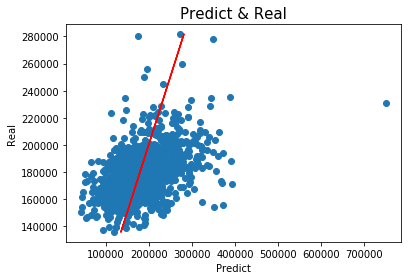

In [282]:
plt.scatter(y_predict.data.numpy(), y_test.data.numpy())

plt.title('Predict & Real', fontdict={'size':15})
plt.xlabel('Predict')
plt.ylabel('Real')

# plt.xlim(-10, 3) 
# plt.ylim(-10, 3)

plt.plot(y_test.data.numpy(), y_test.data.numpy(), 'r-') 
plt.show()

In [283]:
y_test.data

tensor([[169277.0469],
        [187758.3906],
        [183583.6875],
        ...,
        [219222.4219],
        [184924.2812],
        [187741.8594]])

In [284]:
y_predict.data

tensor([[125989.5469],
        [193065.2031],
        [190366.7500],
        ...,
        [185004.9531],
        [130908.8516],
        [221496.8438]])